In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [6]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
X_train.shape # 60k sets of 28 by 28 images

(60000, 28, 28)

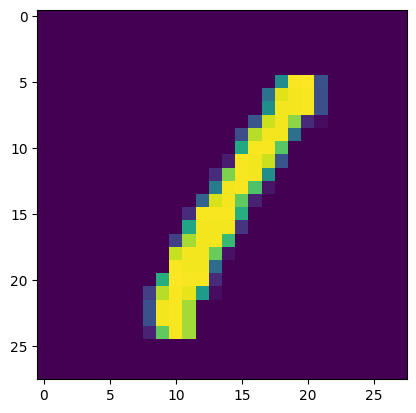

In [11]:
plt.imshow(X_train[3])

In [12]:
# For better convergence we need to scale values of our data set into range of 0 to 1. So we will divide our array with max num of dataset 255
X_train  = X_train/255
X_test = X_test/255

In [14]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
# Since we are dealing with image data, which has 784 pixels (28 by 28), for taking our first input we need to flatten our multi-dimensional data, thus we will use flatten layer as first layer in our model
# We need our data from 784 -> (1,784) shape
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.summary()
# Flatten 784 (28 by 28 img) inputs -> 2nd layer receives 784 inputs so 784*128 -> 100,480

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# If we use loss as sparse_categorical_crossentropy then we dont need to onehotencode our inputs, we usually use this loss when we deal with multiclass-classification
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8787 - loss: 0.4297 - val_accuracy: 0.9619 - val_loss: 0.1241
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9649 - loss: 0.1178 - val_accuracy: 0.9701 - val_loss: 0.0962
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9754 - loss: 0.0796 - val_accuracy: 0.9746 - val_loss: 0.0819
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9817 - loss: 0.0584 - val_accuracy: 0.9745 - val_loss: 0.0847
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9869 - loss: 0.0418 - val_accuracy: 0.9756 - val_loss: 0.0793
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9898 - loss: 0.0342 - val_accuracy: 0.9754 - val_loss: 0.0879
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9915 - loss: 0.0279 - val_accuracy: 0.9768 - val_loss: 0.0793
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9940 - loss: 0.021

In [20]:
y_proba = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [22]:
y_preds = y_proba.argmax(axis=1)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.9795

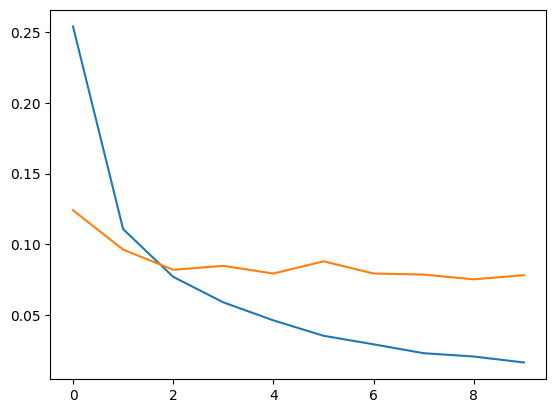

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

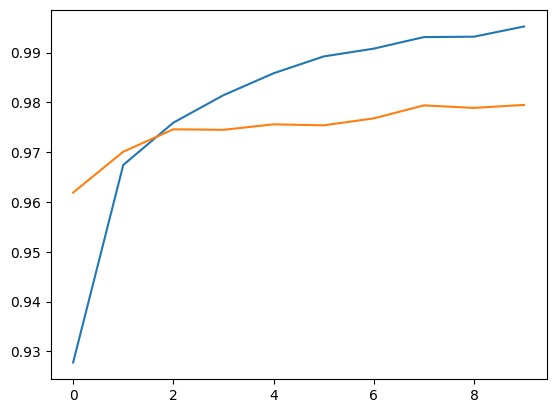

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

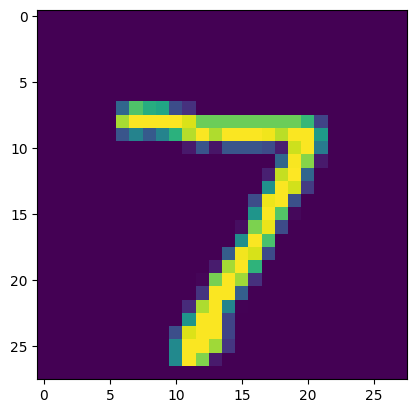

In [31]:
plt.imshow(X_test[0])

In [36]:
prediction = model.predict(X_test[0].reshape(1,28,28))
prediction.argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([7])

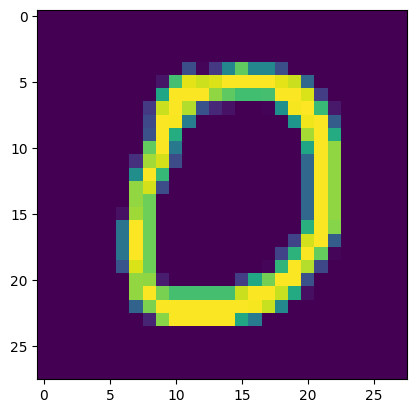

In [37]:
plt.imshow(X_test[10])

In [40]:
prediction2 = model.predict(X_test[10].reshape(1,28,28))
prediction2.argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([0])